In [130]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler

In [131]:
df = pd.read_csv("all_data.csv", encoding='utf-8')
# get data csv files as a pandas DataFrame

In [132]:
# preview the top-5 rows of the data
df.head()

,state,education,year,state_legislature,governor,lt_governor,labour_force_participation,mngmt_job_wage_gap,bachelor_wage_gap,ab_legality,rape_rate,sex_ratio_birth,abortion_rate,life_exp_f_m
0,Alabama,1.180,2020,0.157,1.0,0.0,0.782,0.640,25.1,0,32.7,1.068376,113.548,1.089325
1,Alaska,1.014,2020,0.367,0.0,0.0,0.795,0.779,18.1,1,154.8,0.915751,164.547,1.066098
2,Arizona,1.112,2020,0.389,0.0,0.0,0.789,0.701,23.2,1,44.0,1.012146,184.862,1.083424
3,Arkansas,1.115,2020,0.259,0.0,0.0,0.837,0.705,20.1,0,73.5,1.037344,104.638,1.077586
4,California,1.099,2020,0.308,0.0,1.0,0.764,0.734,18.6,1,34.2,1.011122,16.075,1.076426


In [133]:
round(df.describe() ,3)
#/Users/xuguangjie/Desktop/final-project-233-not-found-main/eda.ipynb

,education,year,state_legislature,governor,lt_governor,labour_force_participation,mngmt_job_wage_gap,bachelor_wage_gap,ab_legality,rape_rate,sex_ratio_birth,abortion_rate,life_exp_f_m
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,1.113,2015.500,0.254,0.128,0.248,0.829,0.711,20.284,0.720,41.277,1.024,226.896,1.065
std,0.046,2.875,0.076,0.334,0.432,0.041,0.044,3.644,0.449,17.820,0.032,268.040,0.009
min,0.947,2011.000,0.094,0.000,0.000,0.732,0.568,10.200,0.000,11.400,0.899,2.714,1.044
25%,1.085,2013.000,0.199,0.000,0.000,0.803,0.683,18.200,0.000,31.075,1.009,121.059,1.059
50%,1.117,2015.500,0.253,0.000,0.000,0.826,0.709,20.100,1.000,38.600,1.030,188.740,1.064
75%,1.141,2018.000,0.304,0.000,0.000,0.862,0.736,22.225,1.000,47.100,1.048,257.928,1.071
max,1.243,2020.000,0.540,1.000,1.000,0.929,0.841,32.100,1.000,161.600,1.074,3700.745,1.096


In [134]:
import plotly.graph_objs as go
import pandas as pd

import_feat = ['state_legislature','mngmt_job_wage_gap','rape_rate','life_exp_m_f','abortion_rate']

# Calculate the rank percentage for each state in 2011
df['pct_rank'] = df[df['year'] == 2020]['state_legislature'].rank(pct=True)

# Divide states into three groups based on rank percentage
df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], labels=[r'前10%', r'10%-45%', r'45%-55%', r'55%-90%', r'后10%'])

# Process each state's data individually and store it in a dictionary
states_data = {}
for state, data in df.groupby('state'):
    # Sort the data by year
    data = data.sort_values('year')
    # Construct Plotly's Trace object
    trace = go.Scatter(
        x=data['year'],
        y=data['state_legislature'],
        name=state,
        line=dict(width=2),
        mode='lines',
        text=data['state_legislature'],
        hovertemplate='<b>%{text:.2f}%</b><brstate: %{name}<br>year: %{x}'
    )
    # Assign the corresponding color according to which group the state belongs to
    if r'前10%' in data['group'].unique():
        trace.update(line=dict(color='#750D86'))
        states_data[state] = trace
    elif r'后10%' in data['group'].unique():
        trace.update(line=dict(color='#FEAF16'))
        states_data[state] = trace
    elif r'45%-55%' in data['group'].unique():
        trace.update(line=dict(color='#00AB8B'))
        states_data[state] = trace
    
    # Store a Trace object for each state

# Construct Plotly's Figure object
fig = go.Figure(list(states_data.values()))

# Add a chart title and axis labels
fig.update_layout(title='State Legislature by Year',
                title_font_size=24,
                legend_title='States:',
                xaxis_title='Year',
                yaxis_title='Female Proportion in State Legislature',
                width=1200,
                height=700)

# show chart
fig.show()


<h4> State legislature</h4>

* Proportion of women in legislature.
* In general, the trend is steady before 2018, with a slight increase after.
    * Colorado: stays the top 1 in female proportion in state legislature. 2018-2019 shows a sharp increase.
    * Hawaii: moved from the top 10% to the middle range (45%-55%)
    * Alaska: moved from the last in the middle range to the top 10% range
    * Oklahoma: shows a sharp increase from 2018-2019.

In [135]:
import_feat = ['state_legislature','mngmt_job_wage_gap','rape_rate','life_exp_m_f','abortion_rate']

# Calculate the rank percentage for each state in 2011
df['pct_rank'] = df[df['year'] == 2020]['mngmt_job_wage_gap'].rank(pct=True)

# Divide states into three groups based on rank percentage
df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], labels=[r'前10%', r'10%-45%', r'45%-55%', r'55%-90%', r'后10%'])

# Process each state's data individually and store it in a dictionary
states_data = {}
for state, data in df.groupby('state'):
    # Sort the data by year
    data = data.sort_values('year')
    # Construct Plotly's Trace object
    trace = go.Scatter(
        x=data['year'],
        y=data['mngmt_job_wage_gap'],
        name=state,
        line=dict(width=2),
        mode='lines',
        text=data['mngmt_job_wage_gap'],
        hovertemplate='<b>%{text:.2f}%</b><brstate: %{name}<br>year: %{x}'
    )
    # Assign the corresponding color according to which group the state belongs to
    if r'前10%' in data['group'].unique():
        
        trace.update(line=dict(color='#750D86'))
        states_data[state] = trace

    elif r'后10%' in data['group'].unique():
        trace.update(line=dict(color='#FEAF16'))
        states_data[state] = trace

    elif r'45%-55%' in data['group'].unique():
        trace.update(line=dict(color='#00AB8B'))
        states_data[state] = trace

    # Store a Trace object for each state

# Construct Plotly's Figure object
fig = go.Figure(list(states_data.values()))

# Add a chart title and axis labels
fig.update_layout(title='Management Job Wage Gap by Year',
                title_font_size=24,
                legend_title='States:',
                xaxis_title='Year',
                yaxis_title='Management Job Wage Gap',
                width=1200,
                height=700)

# show chart
fig.show()


<h4> Management job wage gap </h4>

* Proportion of female wage to male wage in management job.
* In general, the trend is steady before 2019, with a slight increase after.
    * Ohio: From 2014-2018, shows a relatively significant 
    * Utah: Observe a mild fluctuation between 2011 to 2019, then a sudden increase from 2019 to 2020

In [136]:
import_feat = ['state_legislature','mngmt_job_wage_gap','rape_rate','life_exp_m_f','abortion_rate']

# Calculate the rank percentage for each state in 2011
df['pct_rank'] = df[df['year'] == 2020]['rape_rate'].rank(pct=True)

# Divide states into three groups based on rank percentage
df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], labels=[r'前10%', r'10%-45%', r'45%-55%', r'55%-90%', r'后10%'])

# Process each state's data individually and store it in a dictionary
states_data = {}
for state, data in df.groupby('state'):
    # Sort the data by year
    data = data.sort_values('year')
    # Construct Plotly's Trace object
    trace = go.Scatter(
        x=data['year'],
        y=data['rape_rate'],
        name=state,
        line=dict(width=2),
        mode='lines',
        text=data['rape_rate'],
        hovertemplate='<b>%{text:.2f}%</b><brstate: %{name}<br>year: %{x}'
    )
    # Assign the corresponding color according to which group the state belongs to
    if r'前10%' in data['group'].unique():
        
        trace.update(line=dict(color='#750D86'))
        states_data[state] = trace

    elif r'后10%' in data['group'].unique():
        trace.update(line=dict(color='#FEAF16'))
        states_data[state] = trace

    elif r'45%-55%' in data['group'].unique():
        trace.update(line=dict(color='#00AB8B'))
        states_data[state] = trace

    # Store a Trace object for each state

# Construct Plotly's Figure object
fig = go.Figure(list(states_data.values()))

# Add a chart title and axis labels
fig.update_layout(title='rape rate',
                xaxis_title='year',
                yaxis_title='rape rate',
                width=1200,
                height=700)

# show chart
fig.show()

In [137]:
df['pct_rank'] = df[df['year'] == 2020]['rape_rate'].rank(pct=True)

# Divide states into three groups based on rank percentage
df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], labels=[r'前10%', r'10%-45%', r'45%-55%', r'55%-90%', r'后10%'])

# Process each state's data individually and store it in a dictionary
states_data = {}
for state, data in df.groupby('state'):
    # Sort the data by year
    data = data.sort_values('year')
    # Construct Plotly's Trace object
    trace = go.Scatter(
        x=data['year'],
        y=data['rape_rate'],
        name=state,
        line=dict(width=2),
        mode='lines',
        text=data['rape_rate'],
        hovertemplate='<b>%{text:.2f}%</b><brstate: %{name}<br>year: %{x}'
    )
    # Assign the corresponding color according to which group the state belongs to
    if r'前10%' in data['group'].unique():
        
        trace.update(line=dict(color='#750D86'))
        states_data[state] = trace

    elif r'后10%' in data['group'].unique():
        trace.update(line=dict(color='#FEAF16'))
        states_data[state] = trace

    elif r'45%-55%' in data['group'].unique():
        trace.update(line=dict(color='#00AB8B'))
        states_data[state] = trace

    # Store a Trace object for each state

# Construct Plotly's Figure object
fig = go.Figure(list(states_data.values()))

# Add a chart title and axis labels
fig.update_layout(title='Rape Rate by Year',
                title_font_size=24,
                legend_title='States:',
                xaxis_title='Year',
                yaxis_title='Rape Rate',
                width=1200,
                height=700)

# show chart
fig.show()

<h4> Rape Rate </h4>

* Divided the rape occurrences of a state by its population and multiply by 100,000
* In general, the trends across 14 states are steady except for Alaska; also, the differences between each state's rape rate are small. We also see some overlap between the middle 10% states and bottom 10% states
    * Alaska: Observe an abnormal and salient fluctuation compared to the rest of the states. Furthermore, it has a significant higher rape rate than the rest of the states
    * Missisipi: Observe a relatively sudden decrease from 2017 to 2018, followed by a mild increase from 2019 to 2020

In [139]:
import_feat = ['state_legislature','mngmt_job_wage_gap','rape_rate','life_exp_m_f','abortion_rate']

# Calculate the rank percentage for each state in 2011
df['pct_rank'] = df[df['year'] == 2020]['life_exp_f_m'].rank(pct=True)

# Divide states into three groups based on rank percentage
df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], labels=[r'前10%', r'10%-45%', r'45%-55%', r'55%-90%', r'后10%'])

# Process each state's data individually and store it in a dictionary
states_data = {}
for state, data in df.groupby('state'):
    # Sort the data by year
    data = data.sort_values('year')
    # Construct Plotly's Trace object
    trace = go.Scatter(
        x=data['year'],
        y=data['life_exp_f_m'],
        name=state,
        line=dict(width=2),
        mode='lines',
        text=data['life_exp_f_m'],
        hovertemplate='<b>%{text:.2f}%</b><brstate: %{name}<br>year: %{x}'
    )
    # Assign the corresponding color according to which group the state belongs to
    if r'前10%' in data['group'].unique():
        
        trace.update(line=dict(color='#750D86'))
        states_data[state] = trace

    elif r'后10%' in data['group'].unique():
        trace.update(line=dict(color='#FEAF16'))
        states_data[state] = trace

    elif r'45%-55%' in data['group'].unique():
        trace.update(line=dict(color='#00AB8B'))
        states_data[state] = trace

    # Store a Trace object for each state

# Construct Plotly's Figure object
fig = go.Figure(list(states_data.values()))

# Add a chart title and axis labels
fig.update_layout(title='Life Expectancy (Female Over Male) by Year',
                  title_font_size=24,
                  legend_title='States:',
                xaxis_title='Year',
                yaxis_title='Life Expectancy (female over male)',
                width=1200,
                height=700)

# show chart
fig.show()

<h4> Life Expectancy Gender Gap </h4>

* Life Expectancy of male over that of female
* In general, the trends across 15 states experience ocsilation at some extent. Furthermore, all 15 states share a decrease from 2019 to 2020. We also see some overlap between upper 10% states, the middle 10% states, and bottom 10% states

In [124]:
import_feat = ['state_legislature','mngmt_job_wage_gap','rape_rate','life_exp_m_f','abortion_rate']

# Calculate the rank percentage for each state in 2011
df['pct_rank'] = df[df['year'] == 2020]['abortion_rate'].rank(pct=True)

# Divide states into three groups based on rank percentage
df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], labels=[r'前10%', r'10%-45%', r'45%-55%', r'55%-90%', r'后10%'])

# Process each state's data individually and store it in a dictionary
states_data = {}
for state, data in df.groupby('state'):
    # Sort the data by year
    data = data.sort_values('year')
    # Construct Plotly's Trace object
    trace = go.Scatter(
        x=data['year'],
        y=data['abortion_rate'],
        name=state,
        line=dict(width=2),
        mode='lines',
        text=data['abortion_rate'],
        hovertemplate='<b>%{text:.2f}%</b><brstate: %{name}<br>year: %{x}'
    )
    # Assign the corresponding color according to which group the state belongs to
    if r'前10%' in data['group'].unique():
        
        trace.update(line=dict(color='#750D86'))
        states_data[state] = trace

    elif r'后10%' in data['group'].unique():
        trace.update(line=dict(color='#FEAF16'))
        states_data[state] = trace

    elif r'45%-55%' in data['group'].unique():
        trace.update(line=dict(color='#00AB8B'))
        states_data[state] = trace

    # Store a Trace object for each state

# Construct Plotly's Figure object
fig = go.Figure(list(states_data.values()))

# Add a chart title and axis labels
fig.update_layout(title='Abortion Rate by Year',
                  title_font_size=24,
                  legend_title='States:',
                xaxis_title='Year',
                yaxis_title='Abortion Rate',
                width=1200,
                height=700)

# show chart
fig.show()

<h4> Abortion Rate </h4>

* Divided the abortion occurrences of a state by its population and multiply by 100,000
* In general, the trends across 13 states are steady and share a comparatively low abortion rate except for New Hamshire and New Mexico; also, the differences between each state's abortion rate are small
    * New Hamshire: Observe an conspicuously high abortion rate compared to its counterpart states and salient fluctuation compared to the rest of the states. However, it has a sudden decrease from 2018 to 2019 and an increase from 2019 to 2020
    * New Mexicao: While sharing a similarly low and steady trend as its counterparts, it had a drastic increase from 2017 to 2018, followed by a sudden decrease from 2018 to 2019, and then another sharp increase from 2019 to 2020

In [140]:
import numpy as np
import plotly.graph_objs as go

# 计算每年数据的25%数值线
q1 = df.groupby(['year'])['rape_rate'].quantile(0.25).reset_index()
q3 = df.groupby(['year'])['rape_rate'].quantile(0.75).reset_index()

# 合并数据
grouped = df.groupby(['year'])['rape_rate'].agg(['max', 'min', 'median']).reset_index()
grouped = pd.merge(grouped, q1, on='year')
grouped = pd.merge(grouped, q3, on='year')

# 创建散点图数据
data = [
    # go.Scatter(
    #     x=grouped['year'],
    #     y=grouped['max'],
    #     name='Max',
    #     mode='markers+lines',
    #     marker=dict(
    #         color='red'
    #     )
    # ),
    go.Scatter(
        x=q3['year'],
        y=q3['rape_rate'],
        name='Upper Quartile',
        mode='markers+lines',
        line=dict(
            color='#EECA3B'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['median'],
        name='Median',
        mode='markers+lines',
        marker=dict(
            color='#54A24B'
        )
    ),
    go.Scatter(
        x=q1['year'],
        y=q1['rape_rate'],
        name='Lower Quartile',
        mode='markers+lines',
        line=dict(
            color='#4C78A8'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['min'],
        name='Min',
        mode='markers+lines',
        marker=dict(
            color='#9467BD'
        )
    )
]

# 创建布局
layout = go.Layout(
    title='rape rate Change by Year',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Value'
    )
)

# 创建图表
fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=1200,
                height=700)

# 显示图表
fig.show()

主成分方差比例： [0.20081727 0.18868286 0.13938942 0.09702772 0.0867474 ]
主成分方差： [2.81707598 2.64685382 1.95536258 1.36111036 1.21689737]
特征贡献度： [[-0.37333736 -0.42768335  0.31362123 -0.25337719 -0.06009343 -0.05192028
   0.07103936 -0.3176346  -0.32834581  0.39359405  0.03953647 -0.17823004
   0.32515327 -0.033491  ]
 [-0.15510204 -0.29853616 -0.41358215  0.03654831  0.30133027  0.00685356
  -0.0988596   0.01755749  0.11175061 -0.02369014  0.27989357  0.36948097
   0.31717631  0.53385234]
 [ 0.18114338 -0.04174825 -0.1962935   0.10868196 -0.39876693  0.07196915
  -0.2958272  -0.30868496 -0.41316153  0.11237472 -0.43665578  0.32237817
  -0.16996774  0.24757014]
 [-0.17975705  0.11425458  0.06548807  0.65308604  0.32725931  0.16166665
   0.29114544 -0.19499587 -0.11735944  0.36289673  0.10215553  0.19156487
  -0.25401061 -0.10333392]
 [-0.13545382 -0.04565041  0.18657764 -0.09579555  0.07562697  0.76023752
  -0.495177   -0.13457956  0.10984039 -0.13267208  0.17666748  0.01984455
  -0.10989388 -

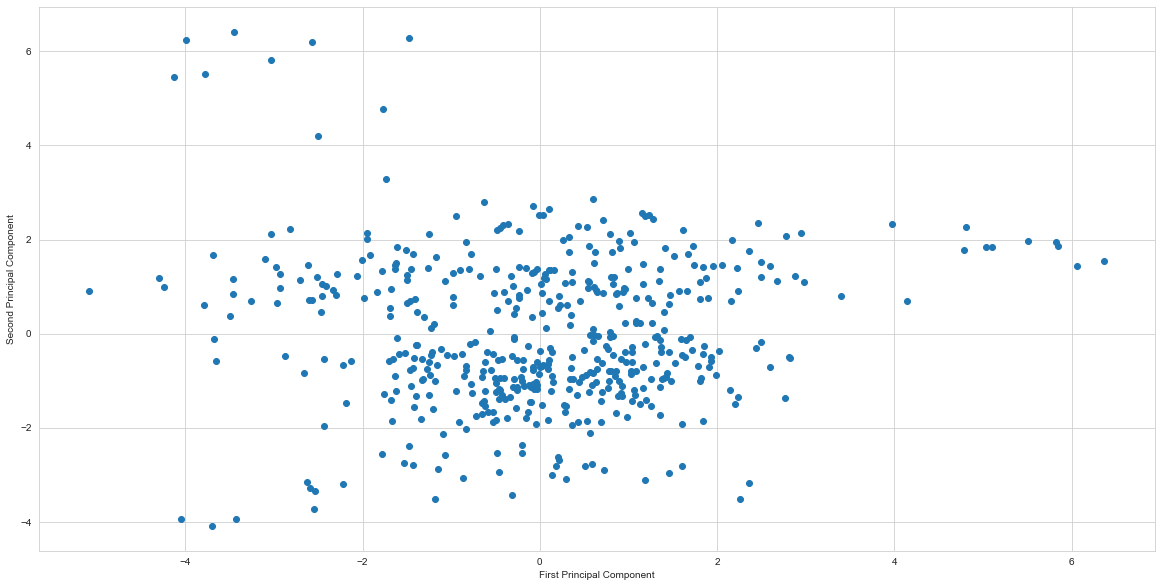

In [54]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# 加载数据集


# 将数据集转换为numpy数组，并进行标准化处理
X = np.array(df.iloc[:, 1:15])
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 初始化PCA对象并拟合数据
pca = PCA(n_components=5)  # 指定要保留的主成分数量为2
X_pca = pca.fit_transform(X)

# 输出主成分方差比例
print("主成分方差比例：", pca.explained_variance_ratio_)

# 输出主成分方差
print("主成分方差：", pca.explained_variance_)

# 输出每个特征的贡献度
print("特征贡献度：", pca.components_)

# 可视化降维后的数据
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [55]:
df.columns

Index(['state', 'bachelor', 'graduate', 'hs', 'year', 'state_legislature',
       'governor', 'lt_governor', 'labour_force_participation',
       'mngmt_job_wage_gap', 'bachelor_wage_gap', 'ab_legality', 'rape_rate',
       'life_exp_m_f', 'sex_ratio_birth', 'abortion_rate', 'pct_rank',
       'group'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
X= df[['state', 'bachelor', 'graduate', 'hs', 'year', 'state_legislature',
       'governor', 'lt_governor', 'labour_force_participation',
       'mngmt_job_wage_gap', 'bachelor_wage_gap', 'ab_legality',
       'life_exp_m_f', 'sex_ratio_birth', 'abortion_rate', 'pct_rank',
       'group']]
y= df['rape_rate']
#Select 30% of the data as test data, and set random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


# 创建PCR模型
model = Pipeline(steps=[('pca', PCA(n_components=8)),
                        ('regression', LinearRegression())])

# 拟合模型
model.fit(X_train, y_train)

# 预测

y_pred = model.predict(X_test)

# 输出预测结果
print(y_pred)


ValueError: could not convert string to float: 'Tennessee'

In [52]:
import numpy as np
from sklearn.decomposition import PCA


# 计算PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

# 输出降维后的数据集形状
print("降维前的数据集形状：", X.shape)
print("降维后的数据集形状：", X_pca.shape)


降维前的数据集形状： (500, 14)
降维后的数据集形状： (500, 8)


In [59]:
X= df[['state', 'bachelor', 'graduate', 'hs', 'year', 'state_legislature',
       'governor', 'lt_governor', 'labour_force_participation',
       'mngmt_job_wage_gap', 'bachelor_wage_gap', 'ab_legality',
       'life_exp_m_f', 'sex_ratio_birth', 'abortion_rate', 'pct_rank',
       'group']]
y= df['rape_rate']

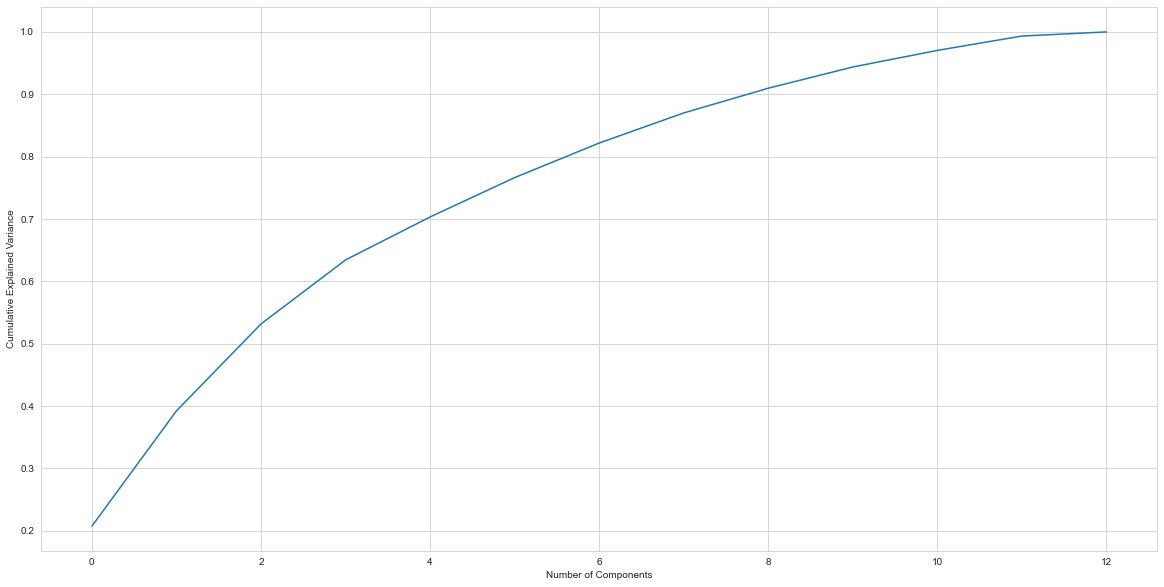

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 加载数据
X= df[[ 'bachelor', 'graduate', 'hs',  'state_legislature',
       'governor', 'lt_governor', 'labour_force_participation',
       'mngmt_job_wage_gap', 'bachelor_wage_gap', 'ab_legality',
       'life_exp_m_f', 'sex_ratio_birth', 'abortion_rate',
       ]]
y= df['rape_rate']
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# 计算PCA
pca = PCA()
pca.fit(X)

# 绘制PCA曲线
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [66]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 创建PCR模型
model = Pipeline(steps=[('pca', PCA(n_components=8)),
                        ('regression', LinearRegression())])

# 拟合模型
model.fit(X_train, y_train)

# 预测

model.score(X_test,y_test)


0.40727619572218676

In [78]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)
r2 = model.score(X_test, y_test)
n = len(y_test)
k = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
adj_r2 

0.7383801326098092

In [68]:

scores = cross_val_score(model,X_test, y_test, cv=10, scoring='accuracy')

/Users/xuguangjie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/xuguangjie/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/xuguangjie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/xuguangjie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/xuguangjie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pr

In [70]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

70.3003644561555

In [75]:
round(metrics.mean_squared_error(y_test, y_pred),4)

70.3004

In [72]:
from sklearn.metrics import r2_score

# 假设y_pred和y_true为模型的预测值和真实值
r2 = r2_score(y_test, y_pred)


In [73]:
r2

0.7612060270800942

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 假设 X_train, X_test, y_train, y_test 分别表示训练集和测试集的自变量和因变量
model = LinearRegression()
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
n = len(y_test)
k = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
adj_r2


0.46206733283891477

In [96]:
import pandas as pd
import numpy as np

# 假设数据集保存在名为 data 的 DataFrame 中，其中包含 State 列和其他特征列


# 随机抽取 10 个州作为测试集
test_states = np.random.choice(df['state'].unique(), size=10, replace=False)
test_data = df[df['state'].isin(test_states)]

# 剩余的州作为训练集
train_data = df[~df['state'].isin(test_states)]

print('测试集数据量：', len(test_data))
print('训练集数据量：', len(train_data))


# 从测试集中选取 'State' 列和 'rape' 列作为测试集的因变量
test_y = test_data.loc[:,  'rape_rate']
test_x = test_data.drop(columns=['state', 'rape_rate', 'year','pct_rank','group','governor','lt_governor','ab_legality'])

# 从训练集中选取 'State' 列和 'rape' 列作为训练集的因变量
train_y = train_data.loc[:, [ 'rape_rate']]
train_x = train_data.drop(columns=['state', 'rape_rate', 'year','pct_rank','group','governor','lt_governor','ab_legality'])



测试集数据量： 100
训练集数据量： 400


In [97]:
train_x

,bachelor,graduate,hs,state_legislature,labour_force_participation,mngmt_job_wage_gap,bachelor_wage_gap,life_exp_m_f,sex_ratio_birth,abortion_rate
1,1.204,1.181,0.717,0.367,0.795,0.779,18.1,0.938,109.2,164.547
2,1.080,1.017,0.969,0.389,0.789,0.701,23.2,0.923,98.8,184.862
3,1.187,1.224,0.921,0.259,0.837,0.705,20.1,0.928,96.4,104.638
5,1.066,1.052,0.877,0.440,0.818,0.729,25.1,0.937,101.4,170.600
7,1.161,1.196,0.992,0.242,0.870,0.751,19.6,0.930,93.6,229.913
...,...,...,...,...,...,...,...,...,...,...
494,1.239,1.259,0.854,0.383,0.917,0.794,14.5,0.953,97.0,212.583
495,1.168,0.917,0.990,0.193,0.825,0.651,26.9,0.947,96.6,320.238
496,1.010,0.931,0.972,0.320,0.804,0.679,19.5,0.949,99.6,309.435
498,1.157,0.998,0.961,0.258,0.769,0.715,22.5,0.946,98.6,137.153


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 假设 X_train, X_test, y_train, y_test 分别表示训练集和测试集的自变量和因变量
model = LinearRegression()
model.fit(train_x, train_y)
r2 = model.score(test_x, test_y)
n = len(test_y)
k = test_x.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
adj_r2

0.13023774483091022